## Дерево решений для задачи диагностики рака груди

Используемый набор данных: [Breast Cancer Wisconsin (Diagnostic) Data Set](https://www.kaggle.com/uciml/breast-cancer-wisconsin-data)

In [ ]:
import pandas as pd
data = pd.read_csv('/content/drive/MyDrive/data_csv/data.csv')

In [ ]:
import matplotlib.pyplot as plt

В изначальный набор данных входит 32 признака, однако для выполнения лабораторной работы было принято решение рассмотреть 10 основных, так как они являются наиболее информативными. 


---


Выбранные признаки:
* id - номер 
* diagnosis - диагноз (M = malignant - злокачественное образование, B = benign - доброкачественное образование)
* radius_mean - среднее расстояние от центра до точек по периметру
* texture_mean - стандартное отклонение значений шкалы серого
* perimeter_mean - средний размер основной опухоли
* area_mean - средняя площадь поверхности опухоли 
* smoothness_mean - среднее значение местных изменений длины радиуса
* compactness_mean - среднее значение периметра в квадрате, разделённого на площадь, после чего вычтено 1.0
* concavity_mean - среднее значение выраженности вогнутых участков контура
* concave points_mean - среднее значение для количества вогнутых частей контура




In [ ]:
data = data.iloc[:, 0:10].set_index('id')
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean
id,,,,,,,,,
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430


In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier

Делим данные на обучающие и тестовые:


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data.iloc[:, 1:10], data.diagnosis, test_size=0.33, random_state=42)

In [ ]:
simple_tree = DecisionTreeClassifier()

Дерево без наложенных ограничений:

In [ ]:
simple_tree.fit(X_train, y_train)
simple_tree.score(X_test, y_test)

0.898936170212766

In [ ]:
from sklearn.tree import plot_tree

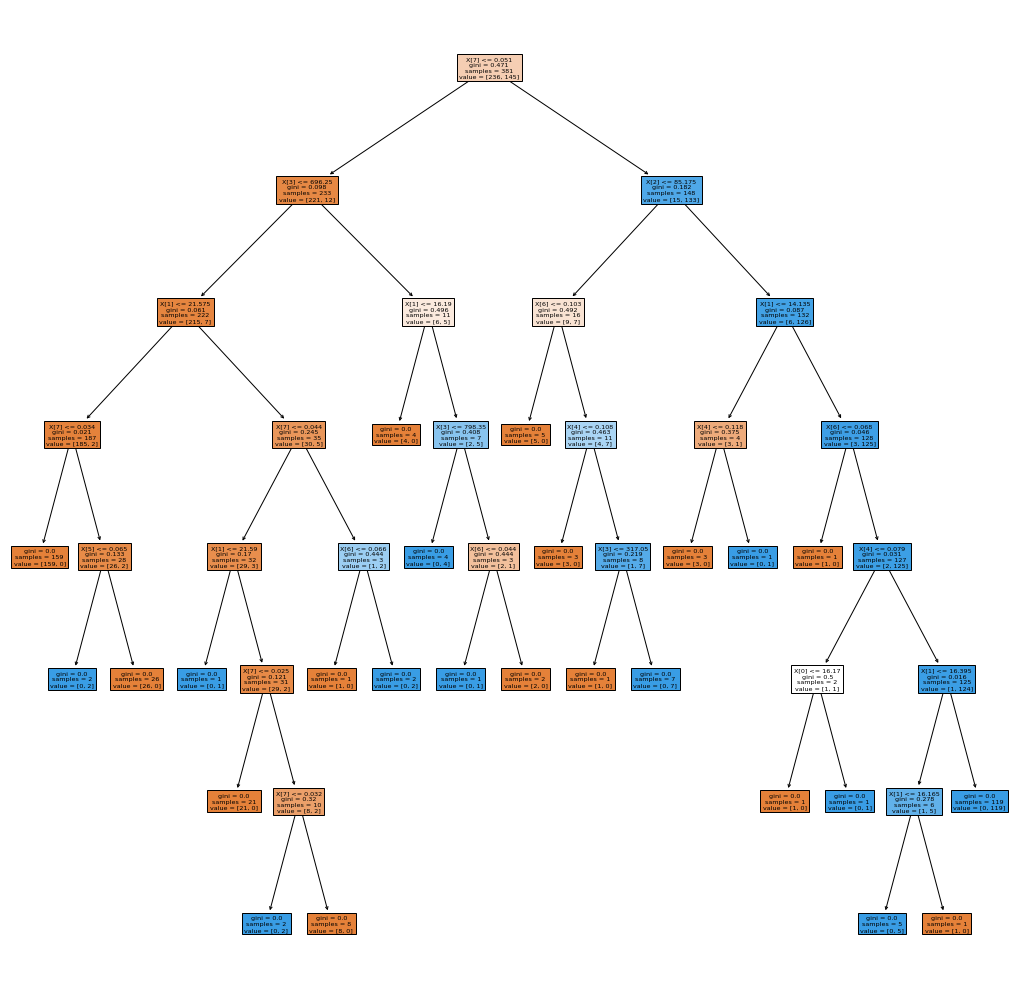

In [ ]:
plt.figure(figsize = (18,18))
plot_tree(simple_tree, filled=True)
plt.show()

Теперь построим дерево, настроив гиперпараметры для более эффективной классификации. Используем GridSearchCV, помогающий автоматизировать процесс подбора параметров.

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
import numpy as np

Зададим диапазоны, из которых будут выбираться оптимальные параметры. Подбираем максимальную глубину дерева и минимальное количество выборок, необходимых для разделения внутреннего "листа":

In [ ]:
tree_params = {'max_depth': np.arange(1, 10), 'min_samples_leaf':np.arange(1, 20)}

In [ ]:
tree_grid = GridSearchCV(simple_tree, tree_params)

In [ ]:
%time
tree_grid.fit(X_train, y_train)

CPU times: user 11 µs, sys: 1 µs, total: 12 µs
Wall time: 16.9 µs


GridSearchCV(cv=None, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
 

In [ ]:
tree_grid.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

Оптимальные ограничения:

In [ ]:
tree_grid.best_params_

{'max_depth': 4, 'min_samples_leaf': 4}

In [ ]:
best_estimators_tree = tree_grid.best_params_

In [ ]:
best_clf = tree_grid.best_estimator_

In [ ]:
best_clf

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

Дерево с наложенными ограничениями показало лучшие результаты на тестовой выборке

In [ ]:
best_clf.fit(X_train, y_train)
best_clf.score(X_test, y_test)

0.9521276595744681

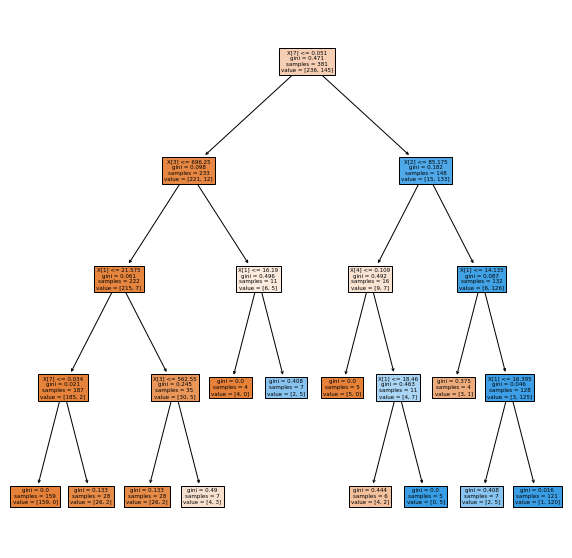

In [ ]:
plt.figure(figsize = (10,10))
plot_tree(best_clf, filled=True)
plt.show()